In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting Seed for synthetic Data
seed = 22
num_samples = 100


In [3]:
# Generating Synthetic Data for num_samples to implement linear regression in pytorch

def generate_synthetic_data(samples):
    X = np.array(range(samples))
    random_noise = np.random.uniform(-10, 20, size=samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [4]:
X, y = generate_synthetic_data(num_samples)
data = np.vstack([X,y]).T
data[:5]

array([[ 0.        , -5.77602765],
       [ 1.        , 10.89385922],
       [ 2.        , 10.12287441],
       [ 3.        ,  0.54376574],
       [ 4.        , 20.22823401]])

In [5]:
# Appending the data into pandas dataframe
df = pd.DataFrame(data, columns=['X','y'])
df.head()

,X,y
0,0.0,-5.776028
1,1.0,10.893859
2,2.0,10.122874
3,3.0,0.543766
4,4.0,20.228234


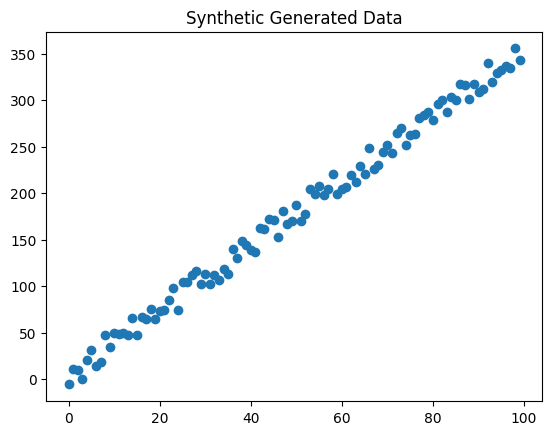

In [6]:
# Let us plot the generated Data
plt.title("Synthetic Generated Data")
plt.scatter(x=df['X'],y=df['y'])
plt.show()

In [7]:
# Using Pytorch and setting the seed
import torch
torch.manual_seed(seed)

In [8]:
train_size = 0.7
val_size = test_size = 0.15
X = df['X']
y = df['y']

In [9]:
# Split the data for training
from sklearn.model_selection import train_test_split
X_train, X_vt, y_train, y_vt = train_test_split(X, y, train_size=0.7)

In [10]:
# Split the data fro testing and validation
X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, train_size = 0.5)

In [11]:
# Standardising the Data (mean = 0, Standard Deviation = 1)
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train.values.reshape(-1,1))
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

In [12]:
# Apply the Standardisation for the training and testing data\
X_train = X_scaler.transform(X_train.values.reshape(-1,1))
y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel().reshape(-1, 1)
X_val = X_scaler.transform(X_val.values.reshape(-1,1))
y_val = y_scaler.transform(y_val.values.reshape(-1,1)).ravel().reshape(-1, 1)
X_test = X_scaler.transform(X_test.values.reshape(-1,1))
y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel().reshape(-1, 1)

In [13]:
# Weights
from torch import nn

In [14]:
# Inputs
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional
LEARNING_RATE = 1e-1
n = 3
x = torch.randn(n,INPUT_DIM)
print(x.shape)
print(x.numpy())

torch.Size([3, 1])
[[ 1.0302248 ]
 [-0.50727177]
 [-0.10168289]]


In [15]:
# Weights
m = nn.Linear(INPUT_DIM, OUTPUT_DIM)
print (m)
print (f"weights ({m.weight.shape}): {m.weight[0][0]}")
print (f"bias ({m.bias.shape}): {m.bias[0]}")

Linear(in_features=1, out_features=1, bias=True)
weights (torch.Size([1, 1])): 0.6347146034240723
bias (torch.Size([1])): 0.5150003433227539


In [16]:
# Forward pass
z = m(x)
print (z.shape)
print(z.detach().numpy())

torch.Size([3, 1])
[[1.168899  ]
 [0.19302756]
 [0.45046073]]


In [17]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x_in):
        y_pred = self.fc1(x_in)
        return y_pred

In [18]:
# Initialize the Model:
model = LinearRegression(input_dim=INPUT_DIM,output_dim=OUTPUT_DIM)
print(model.named_parameters)

<bound method Module.named_parameters of LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [19]:
# Loss
loss_fn = nn.MSELoss()
y_pred = torch.tensor([0.,0.,1.,1.])
y_true = torch.tensor([1.,1.,1.,0.])
loss = loss_fn(y_pred,y_true)
print(f'Loss: {loss.numpy()}')

Loss: 0.75


In [20]:
# Optimizer
from torch.optim import Adam
optimizer = Adam(model.parameters(),lr = LEARNING_RATE)

In [21]:
# Training the Model
# Converting the data into tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [22]:
# Training
for epoch in range(100):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%20==0:
        print (f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.40
Epoch: 20 | loss: 0.02
Epoch: 40 | loss: 0.01
Epoch: 60 | loss: 0.01
Epoch: 80 | loss: 0.01


In [23]:
# Model Evaluation
# Predictions
pred_train = model(X_train)
pred_test = model(X_test)

In [24]:
# Model Perfomance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f"train_error: {train_error:.2f}")
print(f"test_error: {test_error:.2f}")

train_error: 0.01
test_error: 0.01


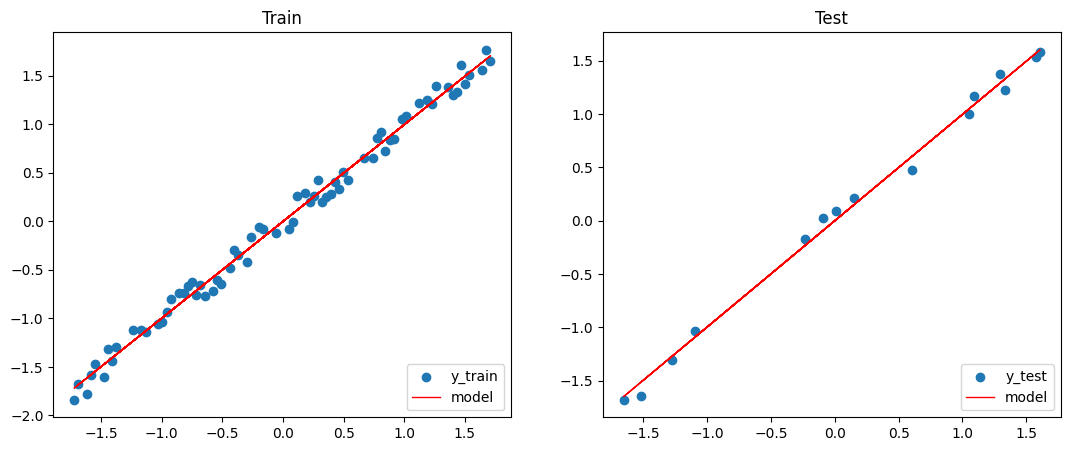

In [25]:
# Inspect the Model
# Figure Size
plt.figure(figsize=(13,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

In [32]:
# After Training the model, we should use it to predict the new data
# Let us use another sample synthetic Data
sample_indices = [11, 16, 26]
X_infer = np.array(sample_indices, dtype=np.float32)
X_infer = torch.Tensor(X_scaler.transform(X_infer.reshape(-1, 1)))

In [33]:
# We need to transform our prediction to the original format
pred_infer = model(X_infer).detach().numpy() * np.sqrt(y_scaler.var_) + y_scaler.mean_
for i, index in enumerate(sample_indices):
    print(f"{df.iloc[index]['y']:.2f} (actual) → {pred_infer[i][0]:.2f} (predicted)")

48.25 (actual) → 44.35 (predicted)
66.36 (actual) → 61.68 (predicted)
103.95 (actual) → 96.32 (predicted)
